<a href="https://colab.research.google.com/github/hsw1805/ML-DL/blob/main/04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#확률 문제


##knn으로 확률 구하기

10명 중 A가 5개 B가 2개 C가 3개면 A일 확률 0.5 이런 식으로

In [8]:
#데이터 호출
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [9]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [10]:
fish_input = fish[['Weight', 'Length','Diagonal','Height',"Width"]]

In [11]:
fish_input.to_numpy()

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [12]:
print(fish_input[:5])

   Weight  Length  Diagonal   Height   Width
0   242.0    25.4      30.0  11.5200  4.0200
1   290.0    26.3      31.2  12.4800  4.3056
2   340.0    26.5      31.1  12.3778  4.6961
3   363.0    29.0      33.5  12.7300  4.4555
4   430.0    29.0      34.0  12.4440  5.1340


In [14]:
print(fish['Species'])
fish_target = fish["Species"].to_numpy()
fish_target

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object


array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [15]:
#데이터 셋 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

###데이터 전처리

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

###KNN으로 확률 예측

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [20]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [26]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [27]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [28]:
import pandas as pd
df = pd.DataFrame(proba,columns=kn.classes_)
print(df)


   Bream  Parkki     Perch  Pike     Roach  Smelt  Whitefish
0    0.0     0.0  1.000000   0.0  0.000000    0.0        0.0
1    0.0     0.0  0.000000   0.0  0.000000    1.0        0.0
2    0.0     0.0  0.000000   1.0  0.000000    0.0        0.0
3    0.0     0.0  0.666667   0.0  0.333333    0.0        0.0
4    0.0     0.0  0.666667   0.0  0.333333    0.0        0.0


In [29]:
max_prob_indices = df.idxmax(axis=1)
print(max_prob_indices)

0    Perch
1    Smelt
2     Pike
3    Perch
4    Perch
dtype: object


In [33]:
max_prob_indices = []
for _, row in df.iterrows():
  print(row.get)
print(max_prob_indices)



<bound method NDFrame.get of Bream        0.0
Parkki       0.0
Perch        1.0
Pike         0.0
Roach        0.0
Smelt        0.0
Whitefish    0.0
Name: 0, dtype: float64>
<bound method NDFrame.get of Bream        0.0
Parkki       0.0
Perch        0.0
Pike         0.0
Roach        0.0
Smelt        1.0
Whitefish    0.0
Name: 1, dtype: float64>
<bound method NDFrame.get of Bream        0.0
Parkki       0.0
Perch        0.0
Pike         1.0
Roach        0.0
Smelt        0.0
Whitefish    0.0
Name: 2, dtype: float64>
<bound method NDFrame.get of Bream        0.000000
Parkki       0.000000
Perch        0.666667
Pike         0.000000
Roach        0.333333
Smelt        0.000000
Whitefish    0.000000
Name: 3, dtype: float64>
<bound method NDFrame.get of Bream        0.000000
Parkki       0.000000
Perch        0.666667
Pike         0.000000
Roach        0.333333
Smelt        0.000000
Whitefish    0.000000
Name: 4, dtype: float64>
[]


#Logistic Regression

위의 방법도 좋지만 확률을 구할 때에는 로지스틱회귀를 많이 사용함

이름만 회귀이고 분류 모델이다!

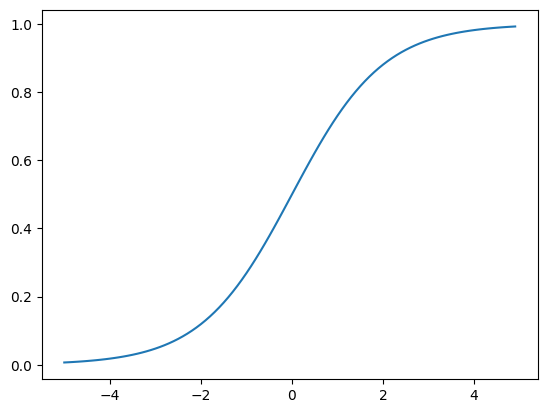

In [36]:
#로지스틱 회귀 모델 그래프
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(-5,5,0.1), 1/(1+np.exp(-np.arange(-5,5,0.1))))


In [43]:
bream_smelt_indexes = (train_target == "Bream") | (train_target=="Smelt")
print(bream_smelt_indexes)
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)


LogisticRegression()

In [47]:
lr.predict(train_bream_smelt)

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [50]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [51]:
#결정 함수 z의 값
lr.decision_function(train_bream_smelt[:5])

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

### Logistic으로 다중 분류

In [52]:
#C가 1/lambda  C가 작으면 작을수록 규제가 커짐
#SVM 때문인가?? SVM의 C와 같은 듯

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [69]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [65]:
classes = lr.classes_
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [66]:
df = pd.DataFrame(proba, columns = classes)
print(df.idxmax(axis=1))
print(test_target[:5])

0    Perch
1    Smelt
2     Pike
3    Roach
4    Perch
dtype: object
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


### Logistic Regression을 7번 사용하여 분류한 것이므로 7행이 있는 것이 당연!

In [67]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


###시그모이드와 소프트맥스 함수의 차이

- 시그모이드 : 하나의 선형 방정식의 출력값을 0~1로 압축
- 소프트맥스 : 여러 출력값을 0~1로 압축하되, 여러 출력값의 합이 1이 되어야 함

In [70]:
#z값을 소프트맥스로 계산하여 합을 1로 만들어보기

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [72]:
from scipy.special import softmax

proba = softmax(decision, axis = 1)
print(np.round(proba, decimals =3).sum(axis=1))


[1.001 1.    1.    1.001 0.998]
